In [1]:
import numpy as np
from scipy.linalg import svd
from PIL import Image
import matplotlib.pyplot as plt

pic_path = "W:/DataSets/SIRST/images/Misc_9.png"

In [21]:
def soft_thresholding(s, tau):
    """
    Soft thresholding function.
    
    Args:
        s (float): The singular value.
        tau (float): The threshold value.
        
    Returns:
        float: The thresholded singular value.
    """
    return np.sign(s) * max(abs(s) - tau, 0)

def st_svd(image, tau):
    """
    Perform SVT on the input image.
    
    Args:
        image (np.ndarray): Input image of shape (M, N).
        tau (float): The threshold for soft thresholding.
        
    Returns:
        np.ndarray: The denoised image after SVT.
    """
    # Perform SVD
    U, S, Vt = svd(image, full_matrices=False)
    
    # Apply soft thresholding to singular values
    S_thresholded = np.array([soft_thresholding(s, tau) for s in S])
    
    # Reconstruct the image using thresholded singular values
    denoised_image = np.dot(U * S_thresholded, Vt)
    
    return denoised_image

In [24]:
# 加载图像
img = Image.open(pic_path).convert('L')  # 更改为你的图像路径

# 将图像转换为numpy数组
img_array = np.array(img)/255

# Set the threshold parameter
tau = 0.5

# Perform SVT
denoised_image = st_svd(img_array, tau)
noised_image = img_array - denoised_image

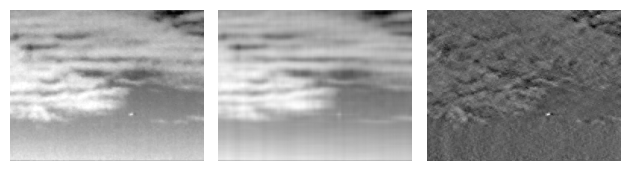

In [27]:
# 创建一个n行2列的子图网格
fig, axes = plt.subplots(1, 3)  # 调整figsize以适应你的需要

for i in range(1):
    
    # 在当前行的第一列显示第一张图片
    axes[0].imshow(img_array, cmap='gray')
    axes[0].axis('off')  # 关闭坐标轴显示
    
    # 在当前行的第二列显示第二张图片
    axes[1].imshow(denoised_image, cmap='gray')
    axes[1].axis('off')  # 同样关闭坐标轴显示

    # 在当前行的第二列显示第二张图片
    axes[2].imshow(noised_image, cmap='gray')
    axes[2].axis('off')  # 同样关闭坐标轴显示
# 显示图表
plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

In [12]:
number = 123
formatted_number = f"{number:06}"  # 整数部分占10位，不足补零，保留两位小数
print(formatted_number)  # 输出 "000000123.46"

000123


In [20]:
import cv2
import numpy as np

img_path = "W:/DataSets/ISTD/IRSTD-1k/trainval/masks/XDU89.png"

In [21]:
mask = np.array(cv2.imread(img_path, 0))

In [22]:
print(np.max(mask))

255


In [ ]:
a = np.